In [62]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [63]:
import pandas as pd
# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')
print(data.head())  # Kiểm tra dữ liệu
total_rows = data.shape[0]
print(f"Tổng số hàng của data: {total_rows}")

          name  Longitude   Latitude
0        Aruba -69.982677  12.520880
1  Afghanistan  66.004734  33.835231
2       Angola  17.537368 -12.293361
3     Anguilla -63.064989  18.223959
4      Albania  20.049834  41.142450
Tổng số hàng của data: 241


In [64]:
data.info()  # Kiểm tra thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [65]:
from sklearn.preprocessing import StandardScaler

# Chỉ lấy cột tọa độ địa lý
X = data[['Longitude', 'Latitude']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

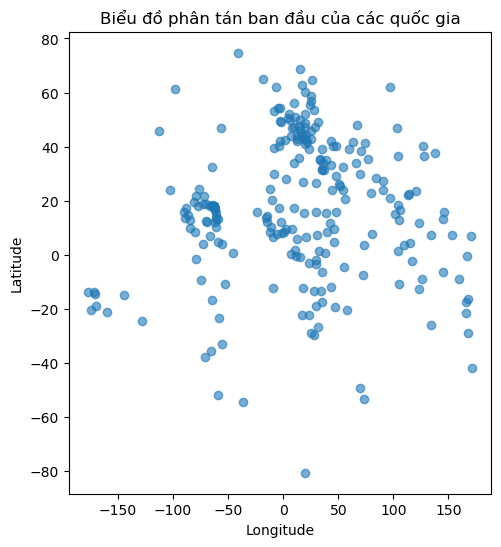

In [66]:
# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')

# Giả sử dữ liệu cần phân cụm là các cột 'Longitude' và 'Latitude'
X = data[['Longitude', 'Latitude']].values  # Chuyển đổi thành numpy array

# Hiển thị biểu đồ ban đầu
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán ban đầu của các quốc gia')
plt.show()

In [67]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

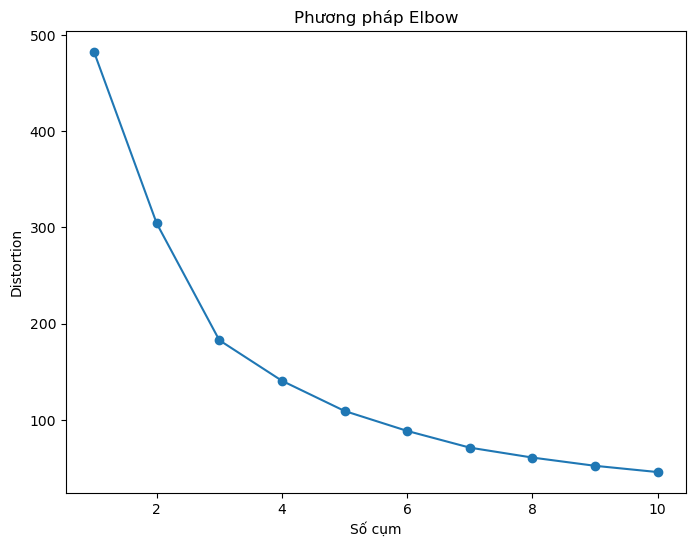

In [68]:
# viet ham elbow để tìm số cụm phù hợp cho data trên
def elbow(X, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions
# ve bieu do elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Số cụm')
plt.ylabel('Distortion')
plt.title('Phương pháp Elbow')
plt.show()

Từ đây có thể thấy chọn K = 3 sẽ hợp lí nhất vì 3 nằm ở đường gấp khúc 

Centers of clusters (custom K-means):
[[117.83854073   7.74193432]
 [-81.36774913   6.6860381 ]
 [ 21.43554776  25.30902689]]
Number of samples in each cluster (custom K-means):
(array([0, 1, 2], dtype=int64), array([ 47,  61, 133], dtype=int64))


Text(0.5, 1.0, 'Biểu đồ phân tán sau khi phân cụm bằng K-means')

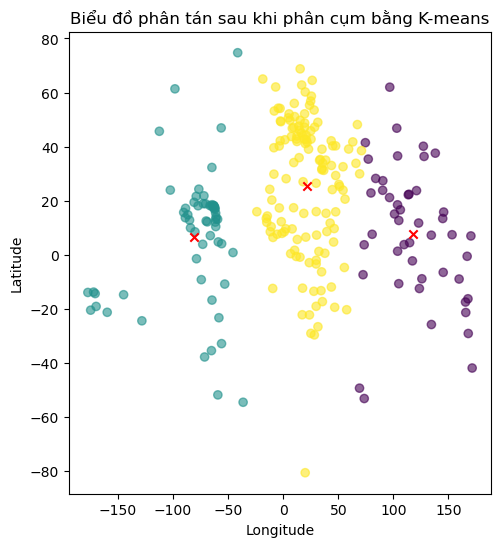

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Các hàm K-means
def kmeans_init_centers(X, k):
    # chọn ngẫu nhiên k hàng của X làm tâm ban đầu
    np.random.seed(42)
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # tính khoảng cách cặp giữa dữ liệu và các tâm cụm
    D = cdist(X, centers)
    # trả về chỉ số của tâm gần nhất
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # thu thập tất cả các điểm được gán cho cụm thứ k
        Xk = X[labels == k, :]
        # lấy trung bình
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers, tol=1e-4):
    # trả về True nếu hai tập hợp các tâm cụm là giống nhau
    return np.all(np.linalg.norm(new_centers - centers, axis=1) < tol)

def kmeans(X, K, max_iters=300, tol=1e-4):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while it < max_iters:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers, tol):
            break
        centers.append(new_centers)
        it += 1
    return (centers[-1], labels[-1])

# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')

# Giả sử dữ liệu cần phân cụm là các cột 'Longitude' và 'Latitude'
X = data[['Longitude', 'Latitude']].values

# Chạy hàm K-means tự viết với số cụm là 5
k = 3
centers_custom, labels_custom = kmeans(X, k)

# In ra giá trị của các tâm cụm từ hàm tự viết
print("Centers of clusters (custom K-means):")
print(centers_custom)
# in ra số lương của mỗi cụm
print("Number of samples in each cluster (custom K-means):")
print(np.unique(labels_custom, return_counts=True))


# Hiển thị các center sau khi phân cụm
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers_custom[:, 0], centers_custom[:, 1], c='red', marker='x')  # Tâm cụm
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán sau khi phân cụm bằng K-means')



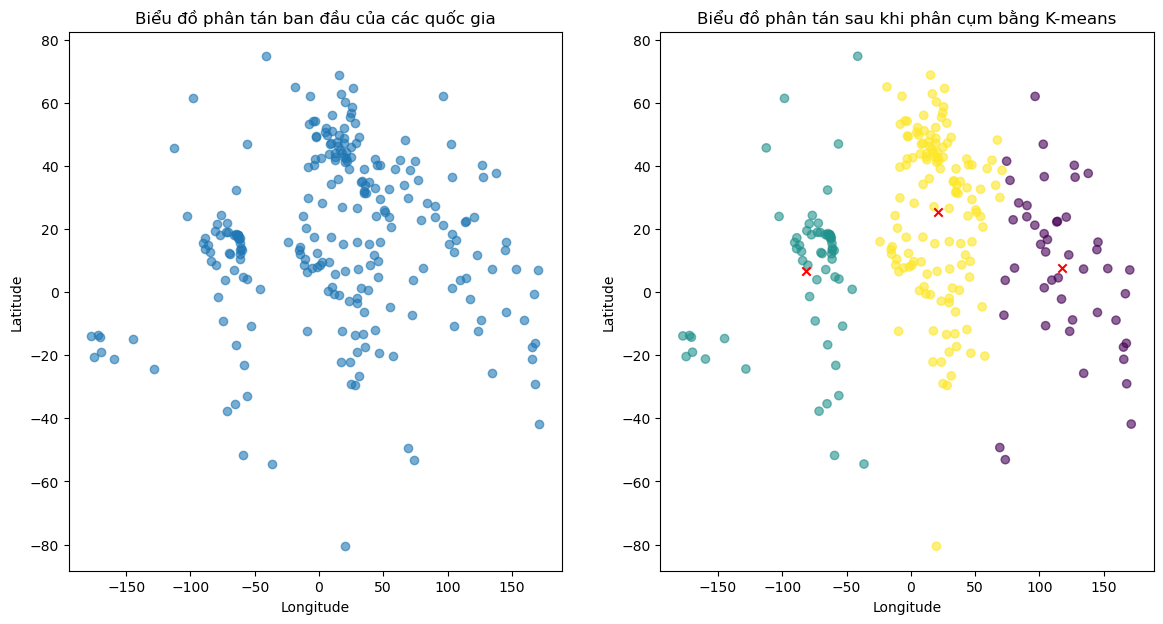

Nhận xét:
Biểu đồ bên trái là biểu đồ phân tán ban đầu của các quốc gia dựa trên tọa độ địa lý (kinh độ và vĩ độ).
Các tâm cụm (dấu 'x' màu đỏ) đại diện cho trung tâm của mỗi cụm.


In [70]:
# Hiển thị biểu đồ trước và sau khi phân cụm
plt.figure(figsize=(14, 7))

# Biểu đồ trước khi phân cụm
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán ban đầu của các quốc gia')

# Biểu đồ sau khi phân cụm
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers_custom[:, 0], centers_custom[:, 1], c='red', marker='x')  # Tâm cụm
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán sau khi phân cụm bằng K-means')

plt.show()

# Nhận xét thực tế
print("Nhận xét:")
print("Biểu đồ bên trái là biểu đồ phân tán ban đầu của các quốc gia dựa trên tọa độ địa lý (kinh độ và vĩ độ).")
print("Các tâm cụm (dấu 'x' màu đỏ) đại diện cho trung tâm của mỗi cụm.")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centers of clusters (scikit-learn K-means):
[[ 21.83186199  25.42957311]
 [-81.36774913   6.6860381 ]
 [118.77977737   7.00888465]]


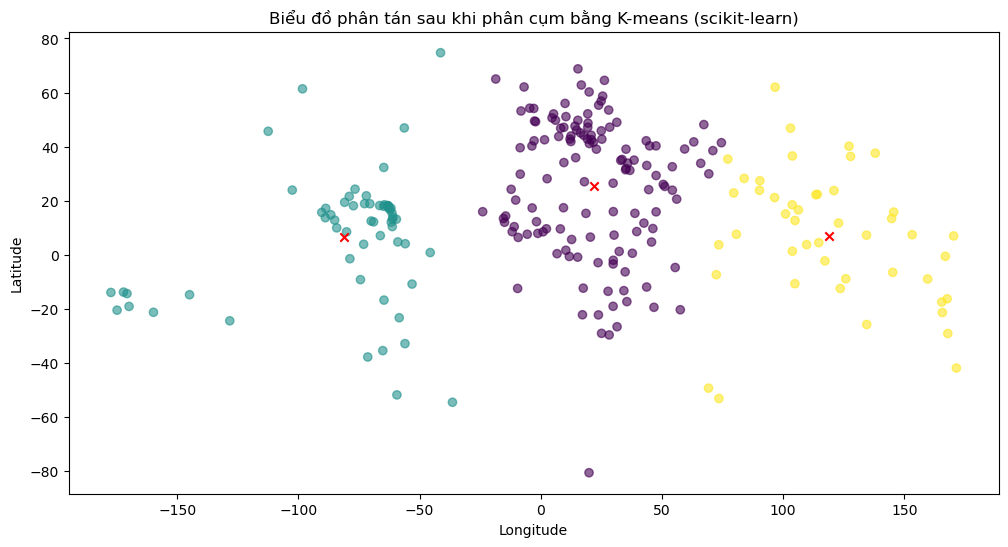

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')

# Giả sử dữ liệu cần phân cụm là các cột 'Longitude' và 'Latitude'
X = data[['Longitude', 'Latitude']].values  # Chuyển đổi thành numpy array

# Chạy hàm K-means từ thư viện scikit-learn với số cụm là 3
k = 3
kmeans_sklearn = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_sklearn = kmeans_sklearn.fit_predict(X)
centers_sklearn = kmeans_sklearn.cluster_centers_

# In ra giá trị của các tâm cụm từ thư viện scikit-learn
print("Centers of clusters (scikit-learn K-means):")
print(centers_sklearn)

# Hiển thị các cụm từ thư viện scikit-learn
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers_sklearn[:, 0], centers_sklearn[:, 1], c='red', marker='x')  # Tâm cụm
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán sau khi phân cụm bằng K-means (scikit-learn)')


plt.show()